# Milestones 2 Phase 2

# i. Introduction

Nama : Vincent Timothy Djaja

Batch : RMT-017

Dataset : complaints_processed

Objective : The Consumer Financial Protection Bureau (CFPB) is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers. Via a web form, consumers can send the agency a narrative of their dispute. I make an NLP model to make the classification of complaints using deep learning-fully connected layer and LSTM, thus they could routing it to the appropriate teams more efficient than manually tagged complaints.

`WARNING` **!**

`This project used undersampling data method to balancing the target, so running all again might be change the result (also the analysis have been made in markdown).`

# ii. Import Libraries

In [71]:
# Import library for this project
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt # Visualization
from wordcloud import WordCloud,ImageColorGenerator # Wordcloud for EDA
from PIL import Image
import nltk # Import NLTK
nltk.download('punkt') # Download punctuatuion
nltk.download('stopwords') # Download stopwords
from nltk.corpus import stopwords # Feature selection
from nltk.tokenize import word_tokenize # Tokenizing
from nltk.stem import PorterStemmer # Stemming
import tensorflow as tf # Tensorflow
from sklearn.model_selection import train_test_split # Split train set and test set
from sklearn.feature_extraction.text import CountVectorizer # countvectorizer
from tensorflow.keras.layers import TextVectorization, Embedding # TextVectorization and Embedding
from tensorflow.keras.utils import to_categorical # Convert target to one hot encoding
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, Dropout, LSTM # Layers
from tensorflow.keras.models import Model, Sequential # Modelling
import warnings # Ignore error message 
warnings.filterwarnings("ignore") # Ignore error message

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# iii. Data Loading

First thing first, let's import dataset but only 10,000 data due to my limitation of computer's memory. Then duplicate original dataset, and showing head and tail of dataset.

In [2]:
# Import dataset
df_ori = pd.read_csv('complaints_processed.csv').iloc[:10000]

# Duplicat dataset
df = df_ori.copy()

# Show head
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


Checking random data to make sure unnamed is equal to index and see the narrative to make sure there is no punctuation and number also all of them already in lowercase.

In [3]:
# Check random data
df.sample(frac=1)

,Unnamed: 0,product,narrative
2884,2884,credit_reporting,account ending reporting reporting twice repor...
6702,6702,mortgages_and_loans,initial application taken bank america residen...
2646,2646,debt_collection,according credit report following portfolio re...
8698,8698,mortgages_and_loans,bank account frozen
2258,2258,credit_reporting,unauthorized student loan reporting credit rep...
...,...,...,...
452,452,retail_banking,related ftc chase blocked complaintants access...
8608,8608,debt_collection,back information stollen car needed get mortga...
2933,2933,credit_reporting,account info reference number bankruptcy court...
9711,9711,retail_banking,stimulus check sent account mine chase bank to...


Now lets see the tail.

In [4]:
# Show tail
df.tail()

,Unnamed: 0,product,narrative
9995,9995,debt_collection,called claiming going sue u year old debt amou...
9996,9996,credit_card,called company one answer
9997,9997,debt_collection,called company never responded back balance up...
9998,9998,credit_card,called credit card company ask approximate dat...
9999,9999,credit_card,called credit card kohl wanted explanation hig...


It seems like **`Unnamed:0`** column is index so I will delete all of them.

In [5]:
# Delete unnecessary column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(1)

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...


Okay, now the dataset ready to be explored.

# iv. Exploratory Data Analysis (EDA)

Let's see information from dataset.

In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   product    10000 non-null  object
 1   narrative  9997 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB


This dataset contains 10,000 rows and 2 columns.

In [7]:
# Checking missing value
df.isnull().sum()

product      0
narrative    3
dtype: int64

There is 3 missing value. Lets drop them.

In [8]:
# Drop missing value
df.dropna(inplace=True)

# Check missing value after dropna
df.isnull().sum()

product      0
narrative    0
dtype: int64

Done, now lets continue to see if our target balance or not?

credit_reporting       5477
debt_collection        1564
mortgages_and_loans    1106
credit_card            1072
retail_banking          778
Name: product, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


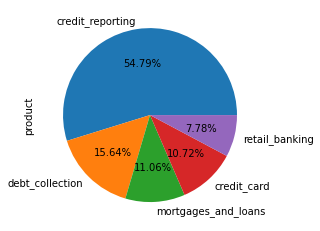

In [9]:
# Target balance checking
print(df['product'].value_counts())
print(df['product'].value_counts().plot(kind='pie',autopct='%.2f%%'))

It seems that the data is not balance, so I'm going to undersampling `credit_reporting`, to 1,700.

In [10]:
# Undersampling credit_reporting
credit_reporting = df[(df['product'] == 'credit_reporting')].sample(1700,random_state=27)
credit_reporting

,product,narrative
5641,credit_reporting,credit agency reporting error account mine nev...
8357,credit_reporting,awhile back lost wallet personal information i...
627,credit_reporting,recent credit report currently reporting appli...
271,credit_reporting,block except otherwise provided section consum...
1058,credit_reporting,added credit report error account never paid l...
...,...,...
4869,credit_reporting,receiving current copy credit report discovere...
7627,credit_reporting,per fair credit reporting act item older year ...
4728,credit_reporting,receiving current copy credit report discovere...
6219,credit_reporting,american adjustment bureau violated hipaa law ...


After choosing 1,700 data, lets drop all of them first before compile.

debt_collection        1564
mortgages_and_loans    1106
credit_card            1072
retail_banking          778
Name: product, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


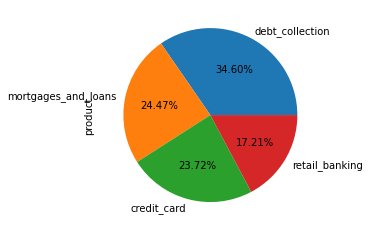

In [11]:
# Drop all credit_reporting column
df.drop(df.index[(df['product'] == 'credit_reporting')], inplace=True)

# Show target after drop credit_reporting column
print(df['product'].value_counts())
print(df['product'].value_counts().plot(kind='pie',autopct='%.2f%%'))

Now lets compile them using concat.

credit_reporting       1700
debt_collection        1564
mortgages_and_loans    1106
credit_card            1072
retail_banking          778
Name: product, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


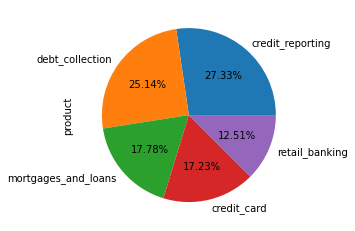

In [12]:
# New df
df = pd.concat([credit_reporting,df])
print(df['product'].value_counts())
print(df['product'].value_counts().plot(kind='pie',autopct='%.2f%%'))

From pie chart above we can see that the dataset is now balance. Now I'm going to shuffle the new dataframe and showing the random data to see if credit reporting blending with others or not.

In [ ]:
# Shuffle new df
df = df.sample(frac = 1)

# Show 10 data after shuffle
df.sample(10,random_state=27)

,product,narrative
6511,credit_card,amidst worldwide crisis facing going pandemic ...
7638,mortgages_and_loans,predicted since commitment made exeter princip...
6654,credit_card,annual capital one member fee placed account c...
6791,retail_banking,apparently pnc stopped allowing bank account c...
7074,credit_card,around went bank america branch ca address cam...
9990,credit_card,called capitalone change ventureone credit car...
8942,credit_card,bank america made mistake tried pull personal ...
513,credit_reporting,victim identity theft year collection agency p...
1491,debt_collection,collection account opened nationwide recovery ...
3208,debt_collection,account police case filed identity theft polic...


As we can see credit reporting is blending with other data, now lets reset the index.

In [14]:
# Reset new df index
df.reset_index(drop=True, inplace=True)

# New df head
df.head()

,product,narrative
0,debt_collection,lady named called claim work refers saying owe...
1,debt_collection,sudden collection account appeared report call...
2,credit_reporting,mentioned contacted equifax via certified mail...
3,credit_reporting,back lost wallet personal information inside t...
4,debt_collection,around called company resolve debt asked could...


Done, now lets see the tail, if the index is already sorted.

In [15]:
# New df tail
df.tail()

,product,narrative
6215,mortgages_and_loans,earlier complaint somehow got lost received ca...
6216,credit_card,closed store card macys mistakenly charged acc...
6217,debt_collection,online dispute bureau closed determined accura...
6218,credit_reporting,account known ftc violation original creditor ...
6219,debt_collection,credit card opened name wrong address garnishe...


Okay, now the data is ready to be proceed.

# v. Preprocessing Data

Lets see the second narrative first.

sudden collection account appeared report called said sent dont live told company law placed collection credit report giving chance validate account didnt care said notice sent address dont live account


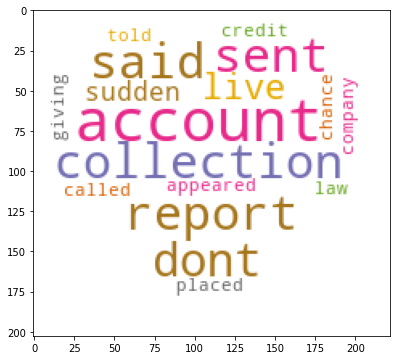

In [78]:
# Show second narrative
print(df.narrative[1])

# Word Cloud
love = np.array(Image.open("love.jpg"))
wc = WordCloud(background_color="white", max_words=100, mask=love, stopwords=df.narrative[1],
               min_font_size=10, colormap='Dark2')
# Generate a wordcloud
wc.generate(df.narrative[1])
# plot 
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.show()

The data doesnt have number and punctuation, and also already in lowercase, so lets jump into stopwords, lets see english stopwords that been downloaded.

In [17]:
# Show the stopwords downloaded
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now lets add some stopwords to the list.

In [18]:
# Stopwords defined
stpwds_en = list(set(stopwords.words('english')))

# Add new stopwords
additional = ['wont','didnt','please','help','thanks','sincerely','dont','wouldnt',
'isnt', 'couldnt', 'cant', 'mightnt','hadnt','doesnt','neednt','arent','werent',
'wasnt','hasnt','havent','shouldnt','mustnt','hadnt','aint','mightnt','shant',
'will', 'did','would','need','might','had','must','have','has','was','were',
'are','does','can','could']
stpwds_en = stpwds_en + additional

# Print new stopwords
print(stpwds_en)

['aren', 'her', 'just', 'o', 'all', 'this', 'his', 'some', 'now', "hasn't", 'him', 'and', "aren't", 's', 'on', 'why', "should've", 'me', "isn't", 'until', "didn't", 'doing', 'was', 'out', 'we', 'each', 'what', 'don', 'himself', 'our', 'when', 'where', 'isn', 'to', 'been', 'yourselves', 'didn', 'my', 'those', 'she', 'between', "shouldn't", "haven't", 'does', 'very', 'before', 'couldn', "needn't", 'if', 'shan', 'its', 'they', 'over', 've', 're', 'both', 'up', 'i', 'down', "won't", 'not', 'be', 'he', 'are', 'weren', "you'll", "shan't", 'won', 'wouldn', 'by', 'yourself', 'for', 'few', 'their', 'during', 'so', 'below', 'shouldn', 'into', 'is', 'under', 'mightn', 'were', 'an', 'with', 'ours', 'more', 'haven', 'm', 'myself', 'as', "you're", 'itself', 'about', 'from', 'here', 't', 'it', 'have', 'will', 'most', "it's", 'own', 'how', 'above', 'these', 'the', 'ain', 'yours', 'y', "you've", 'am', 'ourselves', 'being', 'or', 'again', 'other', 'can', 'mustn', 'hasn', "you'd", 'than', 'no', 'in', 'ma

Now lets make a function to filtering the stopword's list.

In [19]:
# Create a Function for DataFrame

def text_proses(text):
  # Tokenizing
  tokens = word_tokenize(text)

  # Filtering use Stopwords
  text = ' '.join([word for word in tokens if word not in stpwds_en])

  return text

After we create function time to apply it to narrative column and save them to a new column call "stopwords".

In [20]:
# Apply all preprocessing to narrative and create text_processed

df['stopwords'] = df['narrative'].apply(lambda x: text_proses(x))
df.head()

,product,narrative,stopwords
0,debt_collection,lady named called claim work refers saying owe...,lady named called claim work refers saying owe...
1,debt_collection,sudden collection account appeared report call...,sudden collection account appeared report call...
2,credit_reporting,mentioned contacted equifax via certified mail...,mentioned contacted equifax via certified mail...
3,credit_reporting,back lost wallet personal information inside t...,back lost wallet personal information inside t...
4,debt_collection,around called company resolve debt asked could...,around called company resolve debt asked come ...


Done, now lets see the second narrative.

Before stopword:
 sudden collection account appeared report called said sent dont live told company law placed collection credit report giving chance validate account didnt care said notice sent address dont live account
After stopword:
 sudden collection account appeared report called said sent live told company law placed collection credit report giving chance validate account care said notice sent address live account


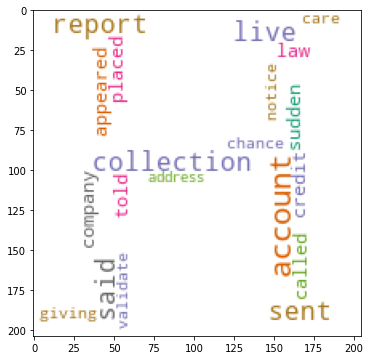

In [84]:
# Show second narrative
print('Before stopword:\n',df.narrative[1])
# Show narrative after delete stopwords
print('After stopword:\n',df.stopwords[1])

# Word Cloud
H = np.array(Image.open("H.jpg"))
wc_2 = WordCloud(background_color="white", max_words=100, mask=H, stopwords=df.stopwords[1],
               min_font_size=5, colormap='Dark2')
# Generate a wordcloud
wc_2.generate(df.stopwords[1])
# plot 
plt.figure(figsize=(10,6))
plt.imshow(wc_2)
plt.show()

As you can see, dont is delete from that sentence, filtering is done now lets stemming the word using PorterStemmer. Then I save it to a new column call "stemmed".

In [22]:
# Stemming defined
stemmer = PorterStemmer()

# Create stemming loop
stemmed_content = []

for doc in df.stopwords:
  result1 = [stemmer.stem(word) for word in doc.split()]
  result2 = ' '.join(result1)
  stemmed_content.append(result2)

df['stemmed'] = stemmed_content


Now lets see the difference before and after stemming.

Before stemming:
 sudden collection account appeared report called said sent live told company law placed collection credit report giving chance validate account care said notice sent address live account
After stemming:
 sudden collect account appear report call said sent live told compani law place collect credit report give chanc valid account care said notic sent address live account


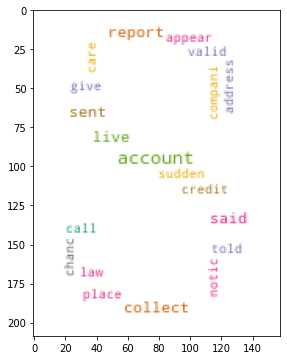

In [90]:
# Show second narrative after stopwords
print('Before stemming:\n',df.stopwords[1])
# Show narrative after stemming
print('After stemming:\n',df.stemmed[1])

# Word Cloud
eight = np.array(Image.open("8.jpg"))
wc_3 = WordCloud(background_color="white", max_words=100, mask=eight, stopwords=df.stemmed[1],
               min_font_size=4, colormap='Dark2')
# Generate a wordcloud
wc_3.generate(df.stemmed[1])
# plot 
plt.figure(figsize=(10,6))
plt.imshow(wc_3)
plt.show()

As you can see collection change to collect, appeared change to appear, etc. Now lets see all target unique value.

In [24]:
# Show unique value from the bank products(target)
df['product'].unique()

array(['debt_collection', 'credit_reporting', 'retail_banking',
       'mortgages_and_loans', 'credit_card'], dtype=object)

We have 5 category here, now lets label all of them, and save it to a new column call "target".

In [25]:
# Now lets encode the target
df['target'] = df['product'].replace({'debt_collection' : 1, 
                                      'credit_reporting' : 2, 
                                      'credit_card' : 3, 
                                      'retail_banking' : 4,
                                      'mortgages_and_loans' : 5
                                     })
df.head()

,product,narrative,stopwords,stemmed,target
0,debt_collection,lady named called claim work refers saying owe...,lady named called claim work refers saying owe...,ladi name call claim work refer say owe capit ...,1
1,debt_collection,sudden collection account appeared report call...,sudden collection account appeared report call...,sudden collect account appear report call said...,1
2,credit_reporting,mentioned contacted equifax via certified mail...,mentioned contacted equifax via certified mail...,mention contact equifax via certifi mail respo...,2
3,credit_reporting,back lost wallet personal information inside t...,back lost wallet personal information inside t...,back lost wallet person inform insid think muc...,2
4,debt_collection,around called company resolve debt asked could...,around called company resolve debt asked come ...,around call compani resolv debt ask come agree...,1


Done, now lets we split train set and test set.

In [26]:
# Splitting corpus
X_train, X_test, y_train, y_test = train_test_split(df.stemmed, 
                                                    df.target, 
                                                    test_size=0.25, 
                                                    random_state=27, 
                                                    stratify=df.target)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (4665,)
Test Size  :  (1555,)


Train set contains 4665 and test set contains 1555. Now lets find out how many vocab and maximum sentence lenth using countvectorizer.

In [27]:
# CountVectorizer

count = CountVectorizer()
X_train_coun = count.fit_transform(X_train)
X_test_coun = count.transform(X_test)

X_train_coun

<4665x7951 sparse matrix of type '<class 'numpy.int64'>'
	with 282906 stored elements in Compressed Sparse Row format>

In [28]:
# Looking total vocab and token's max length for one document

total_vocab_coun = len(count.vocabulary_.keys())
max_sen_len_coun = max([len(i.split(" ")) for i in X_train])

print("Total vocab : ", total_vocab_coun)
print("Maximum sentence length : ", max_sen_len_coun)

Total vocab :  7951
Maximum sentence length :  2564


Now lets setting textvectorization parameter for modelling. I'm using total vocab as max_token, standardize lower and strip punctuation, split by whitespace, ngrams become None because if I choose 1 and above, the data will too much(overkill), output_mode integral, output_sequence_length equal to maximum sentence lenth, and input shape (1,) because I'm using sequential API.

In [29]:
# Text Vectorization's parameter setting

vector = TextVectorization(max_tokens=total_vocab_coun,
                           standardize="lower_and_strip_punctuation",
                           split="whitespace",
                           ngrams=None,
                           output_mode="int",
                           output_sequence_length = max_sen_len_coun,
                           input_shape=(1,)
                           )

vector.adapt(X_train)

Now lets see top 10 token.

In [30]:
# Show top 10 token (Sort by token's count ascending)

vector.get_vocabulary()[:10]

['',
 '[UNK]',
 'account',
 'report',
 'credit',
 'call',
 'payment',
 'inform',
 'claim',
 'debt']

This top 10 is already good, there isnt single alphabet etc, now lets continue to setting embedding's parameter. One vocab I change to 32 element, with uniform initializer to randomized, and still for input length equal to maximum sentence length. 

In [31]:
# Embedding's parameter setting

embedding = Embedding(input_dim=total_vocab_coun,
                      output_dim=32,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len_coun
                      )

Now lets change the y_train and y_test to label using one hot encoder because the target is ordinal data type.

In [32]:
# Change Target to One Hot Encoding

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

Now lets define the model.

# vi. Model Definition

First model is Sequential API using deep learning fully connected layer (Dense). Im using global average pooling to average all element weight. Hidden layer activation use relu, output layer use softmax, and loss using categorical_crossentropy due to multiclass classification. Im using accracy for metrics and adam optimizer. 

In [33]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API using Deep learning-fully connected layer
model1 = Sequential()
model1.add(vector)
model1.add(embedding)
model1.add(GlobalAveragePooling1D())
model1.add(Dense(32,activation='relu'))
model1.add(Dense(6,activation='softmax'))

# Compile
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

Second model is Sequential API using LSTM. Im using 2 hidden layer and 32 neuron each, return sequence equal to True so can save the result from first hidden layer to a second hidden layer, output layer use softmax, and loss using categorical_crossentropy due to multiclass classification. Im using accracy for metrics and adam optimizer. 

In [34]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create model using LSTM layer
model2 = Sequential()
model2.add(vector)
model2.add(embedding)
model2.add(LSTM(32, return_sequences=True))
model2.add(LSTM(32))
model2.add(Dropout(0.2))
model2.add(Dense(6,activation='softmax'))

# Compile
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

Now lets train the model!

# vii. Model Training

Traind the first model.

In [35]:
# Train model using deep learning-fully connected layer
model_dnn_hist_1 = model1.fit(X_train,
                         y_train_ohe,
                         epochs=30,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/30
146/146 [==============================] - 4s 20ms/step - loss: 1.6723 - accuracy: 0.2547 - val_loss: 1.5883 - val_accuracy: 0.2733
Epoch 2/30
146/146 [==============================] - 3s 20ms/step - loss: 1.5776 - accuracy: 0.2742 - val_loss: 1.5679 - val_accuracy: 0.2733
Epoch 3/30
146/146 [==============================] - 3s 21ms/step - loss: 1.5636 - accuracy: 0.2838 - val_loss: 1.5538 - val_accuracy: 0.2740
Epoch 4/30
146/146 [==============================] - 3s 19ms/step - loss: 1.5419 - accuracy: 0.2823 - val_loss: 1.5268 - val_accuracy: 0.2746
Epoch 5/30
146/146 [==============================] - 3s 18ms/step - loss: 1.5110 - accuracy: 0.2982 - val_loss: 1.4960 - val_accuracy: 0.2785
Epoch 6/30
146/146 [==============================] - 3s 18ms/step - loss: 1.4768 - accuracy: 0.3235 - val_loss: 1.4576 - val_accuracy: 0.3087
Epoch 7/30
146/146 [==============================] - 3s 19ms/step - loss: 1.4397 - accuracy: 0.3573 - val_loss: 1.4193 - val_accuracy: 0.3601

Train the second model is taking so long, so I decide to make 1 epochs only because 1 epoch took 256s the accuracy is also similar to model1's first ecohs.

In [38]:
# Train model using LSTM

model_lstm_hist_1 = model2.fit(X_train,
                         y_train_ohe,
                         epochs=1,
                         validation_data=(X_test, y_test_ohe))

146/146 [==============================] - 256s 2s/step - loss: 1.5835 - accuracy: 0.2617 - val_loss: 1.5738 - val_accuracy: 0.2733


Clearly I choose first model to be improved.

# viii. Model Evaluation

Even though I choose first model, lets see model's performance to compared it with the improved one.

<AxesSubplot: >

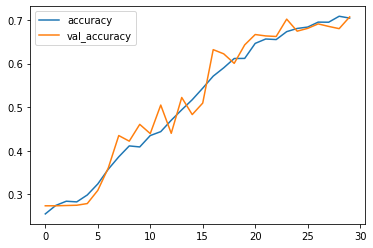

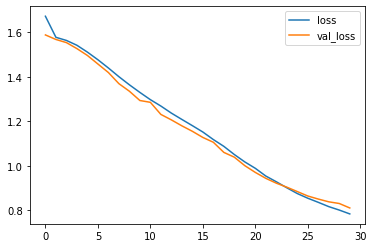

In [39]:
# Create DataFrame
metrics_1 = pd.DataFrame(model_dnn_hist_1.history)

# Plot between accuracy and val_accuracy
metrics_1[['accuracy', 'val_accuracy']].plot()

# Plot between loss and val_loss
metrics_1[['loss', 'val_loss']].plot()

From the accuracy and loss comparison to validation set, seems that need more data or need more epochs. Highest accuracy that model reach is 70% and lowest loss score is 0.8. If we see the comparison to validation set, it show us a little bit explosion/overfit especially in accuracy, for instance at 15th epoch there is 10% explosion. Now lets improve this model.

# ix. Model Improvement

After seeing the evaluation model also doing trial and error several time, I think that adding another layer and change the layer one to 18 neuron, layer 2 12 neuron, and not adding any dropout and batch normalization is the best and quick model.

In [65]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Improve Sequential API using Deep learning-fully connected layer
model_imp = Sequential()
model_imp.add(vector)
model_imp.add(embedding)
model_imp.add(GlobalAveragePooling1D())
model_imp.add(Dense(18,activation='relu'))
model_imp.add(Dense(12,activation='relu'))
model_imp.add(Dense(6,activation='softmax'))

# Compile
model_imp.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

Done, now lets train the improved model. I think if adding 6 more epochs to the model will also good and not wasting time.

In [66]:
# Train improved model
model_dnn_hist_imp = model_imp.fit(X_train,
                         y_train_ohe,
                         epochs=36,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/36
146/146 [==============================] - 4s 21ms/step - loss: 1.6143 - accuracy: 0.2845 - val_loss: 1.4712 - val_accuracy: 0.3222
Epoch 2/36
146/146 [==============================] - 3s 20ms/step - loss: 1.3215 - accuracy: 0.4673 - val_loss: 1.2088 - val_accuracy: 0.5691
Epoch 3/36
146/146 [==============================] - 3s 19ms/step - loss: 1.0475 - accuracy: 0.6718 - val_loss: 0.9931 - val_accuracy: 0.6547
Epoch 4/36
146/146 [==============================] - 3s 18ms/step - loss: 0.8322 - accuracy: 0.7768 - val_loss: 0.8499 - val_accuracy: 0.7698
Epoch 5/36
146/146 [==============================] - 3s 18ms/step - loss: 0.6838 - accuracy: 0.8302 - val_loss: 0.7651 - val_accuracy: 0.7659
Epoch 6/36
146/146 [==============================] - 3s 21ms/step - loss: 0.5790 - accuracy: 0.8570 - val_loss: 0.7186 - val_accuracy: 0.7627
Epoch 7/36
146/146 [==============================] - 3s 20ms/step - loss: 0.4983 - accuracy: 0.8808 - val_loss: 0.6770 - val_accuracy: 0.7781

Now lets see the improved model performance.

<AxesSubplot: >

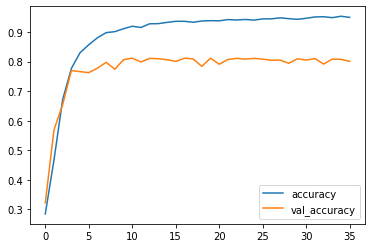

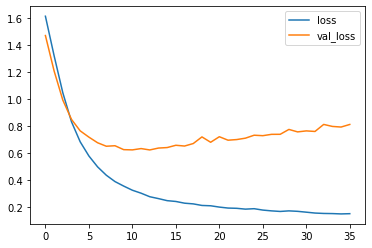

In [67]:
# Create DataFrame
metrics_imp = pd.DataFrame(model_dnn_hist_imp.history)

# Plot between accuracy and val_accuracy
metrics_imp[['accuracy', 'val_accuracy']].plot()

# Plot between loss and val_loss
metrics_imp[['loss', 'val_loss']].plot()

Accuracy is increase to 95% but the val is still the same, it happens to loss too. From this result I conclude that this model is still overfit, there is a big gap between train and test set more than 5%.

# x. Model Saving for Inference & Deploy

Before saving the model, we need to freeze the model first so Trainable parameter move to non trainable parameter.

In [68]:
# Freeze model

model_imp.trainable = False
model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 2564)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 2564, 32)          254432    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 18)                594       
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dense_2 (Dense)             (None, 6)                 7

Last but not least Save the improved model.

In [70]:
# Save model

model_imp.save('classification_model')

INFO:tensorflow:Assets written to: classification_model\assets


INFO:tensorflow:Assets written to: classification_model\assets


# xi. Conclusion

For conclusion, after doing this project, I found ANN model which could helping Financial's institutions to handle customer's complaints more efficiently, with a `95% accuracy prediction level`. 

First of all, I limit the data input from 162,400 to 10.000 due to my computer memory limitation. However, the target is imbalance. So, I need to undersampling credit reporting from 5477 to 1700. Disclaimer, all this number might be change if this notebook re-run.

For preprocessing data that I use for this model is english stopwords and stemming by Porterstemmer because the data is already in lower case, no punctuation, and no number. 

Than I use countvectorization to see total vocab and maximum sentence length and use this information as a Textvectorization parameter. I continue to embbeding dan modeling using Dense Layer and LSTM. Sadly LSTM took 256 second to proceed 1 epochs, so I couldnt see the final accuracy from this model. Thus, I decide to improve the Dense layer by adding new layer and change the neuron to 18 and 12. I also adding a 6 epochs so total epochs for improved model is 36, and the model achieve `95% accuracy`.

Business Recommendation:
- Make an AI/bot chat based on this model so a company can response the complaints faster yet accurate, so the customer will be statisfied and the company can reduce the cost of customer service salaries.

- Giving attention to credit reporting product, doing some research from competitor.

---

$$Thank You$$

---